# Data Preparation and Processing

In [157]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [158]:
train_labels = []
train_samples = []

Example data:

- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years od, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [159]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)    
    
    # The ~95% of older individuals who did experience side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [160]:
print(train_samples)

[53, 66, 19, 89, 62, 85, 19, 89, 14, 97, 44, 75, 51, 73, 61, 97, 49, 76, 39, 80, 28, 90, 41, 100, 30, 83, 26, 65, 59, 93, 40, 77, 29, 99, 43, 91, 47, 91, 13, 87, 52, 89, 25, 85, 40, 97, 21, 99, 14, 74, 61, 82, 16, 96, 14, 73, 35, 88, 31, 79, 38, 75, 20, 95, 55, 97, 54, 78, 30, 68, 46, 83, 43, 71, 29, 75, 37, 84, 24, 75, 54, 84, 23, 97, 44, 81, 52, 83, 41, 83, 13, 82, 18, 69, 34, 96, 32, 99, 28, 80, 30, 67, 58, 75, 52, 79, 19, 73, 19, 83, 40, 98, 64, 66, 23, 91, 17, 65, 39, 98, 49, 94, 50, 82, 52, 80, 58, 66, 43, 68, 23, 68, 22, 92, 26, 71, 55, 65, 39, 90, 48, 74, 40, 95, 14, 81, 17, 74, 16, 91, 42, 89, 53, 79, 16, 65, 25, 80, 35, 85, 47, 66, 59, 84, 64, 91, 41, 74, 13, 66, 54, 70, 46, 74, 44, 67, 64, 73, 45, 93, 30, 65, 26, 70, 63, 65, 57, 82, 58, 69, 54, 69, 64, 76, 13, 85, 44, 71, 14, 96, 31, 81, 49, 65, 63, 73, 21, 98, 29, 95, 25, 78, 25, 73, 34, 73, 54, 93, 60, 92, 20, 66, 43, 83, 51, 93, 37, 95, 55, 70, 40, 67, 53, 80, 25, 79, 13, 68, 15, 92, 64, 66, 53, 69, 42, 98, 48, 77, 49, 85

In [161]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [162]:
train_labels =  np.array(train_labels)
train_samples =  np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [163]:
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [164]:
print(scaled_train_samples)

[[0.68965517]
 [0.64367816]
 [0.        ]
 ...
 [0.12643678]
 [0.77011494]
 [0.62068966]]


# Simple tf.keras Sequential Model

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [166]:
# In case you run a GPU!

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [167]:
model =  Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [168]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [169]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [170]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
model_fit = model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6902 - accuracy: 0.4514
Epoch 2/30
210/210 - 0s - loss: 0.6582 - accuracy: 0.5781
Epoch 3/30
210/210 - 0s - loss: 0.6249 - accuracy: 0.6757
Epoch 4/30
210/210 - 0s - loss: 0.5920 - accuracy: 0.7419
Epoch 5/30
210/210 - 0s - loss: 0.5596 - accuracy: 0.7695
Epoch 6/30
210/210 - 0s - loss: 0.5273 - accuracy: 0.8062
Epoch 7/30
210/210 - 0s - loss: 0.4962 - accuracy: 0.8305
Epoch 8/30
210/210 - 0s - loss: 0.4666 - accuracy: 0.8552
Epoch 9/30
210/210 - 0s - loss: 0.4390 - accuracy: 0.8633
Epoch 10/30
210/210 - 0s - loss: 0.4136 - accuracy: 0.8771
Epoch 11/30
210/210 - 0s - loss: 0.3911 - accuracy: 0.8890
Epoch 12/30
210/210 - 1s - loss: 0.3711 - accuracy: 0.9076
Epoch 13/30
210/210 - 1s - loss: 0.3546 - accuracy: 0.9048
Epoch 14/30
210/210 - 0s - loss: 0.3400 - accuracy: 0.9110
Epoch 15/30
210/210 - 0s - loss: 0.3283 - accuracy: 0.9186
Epoch 16/30
210/210 - 0s - loss: 0.3182 - accuracy: 0.9229
Epoch 17/30
210/210 - 0s - loss: 0.3097 - accuracy: 0.9252
Epoch 

Text(0, 0.5, 'Loss')

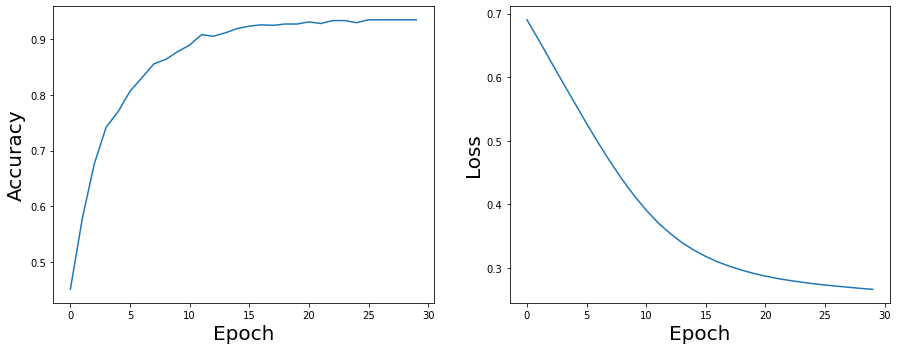

In [172]:
import matplotlib
from matplotlib import pyplot as plt

fig = plt.figure(1, figsize=(15, 12), facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
plt.plot(model_fit.epoch,model_fit.history["accuracy"])
plt.xlabel('Epoch' , fontsize=20)
plt.ylabel('Accuracy' , fontsize=20)

ax2 = plt.subplot(2, 2, 2)
plt.plot(model_fit.epoch,model_fit.history["loss"])
plt.xlabel('Epoch' , fontsize=20)
plt.ylabel('Loss' , fontsize=20)

# Creating A Validation Set

In [173]:
model_fit = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2665 - accuracy: 0.9349 - val_loss: 0.2551 - val_accuracy: 0.9429
Epoch 2/30
189/189 - 0s - loss: 0.2655 - accuracy: 0.9392 - val_loss: 0.2532 - val_accuracy: 0.9333
Epoch 3/30
189/189 - 0s - loss: 0.2643 - accuracy: 0.9344 - val_loss: 0.2525 - val_accuracy: 0.9333
Epoch 4/30
189/189 - 0s - loss: 0.2635 - accuracy: 0.9376 - val_loss: 0.2509 - val_accuracy: 0.9333
Epoch 5/30
189/189 - 0s - loss: 0.2625 - accuracy: 0.9370 - val_loss: 0.2507 - val_accuracy: 0.9333
Epoch 6/30
189/189 - 0s - loss: 0.2617 - accuracy: 0.9360 - val_loss: 0.2495 - val_accuracy: 0.9333
Epoch 7/30
189/189 - 0s - loss: 0.2610 - accuracy: 0.9376 - val_loss: 0.2491 - val_accuracy: 0.9333
Epoch 8/30
189/189 - 0s - loss: 0.2601 - accuracy: 0.9386 - val_loss: 0.2477 - val_accuracy: 0.9333
Epoch 9/30
189/189 - 0s - loss: 0.2595 - accuracy: 0.9354 - val_loss: 0.2483 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2589 - accuracy: 0.9370 - val_loss: 0.2491 - val_accuracy: 0.9429

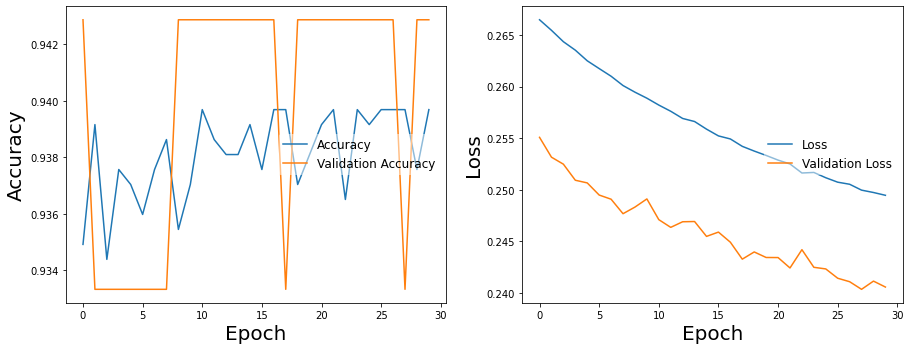

In [174]:
fig = plt.figure(1, figsize=(15, 12), facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
plt.plot(model_fit.epoch,model_fit.history["accuracy"], label="Accuracy" )
plt.plot(model_fit.epoch,model_fit.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel('Epoch' , fontsize=20)
plt.ylabel('Accuracy' , fontsize=20)

ax2 = plt.subplot(2, 2, 2)
plt.plot(model_fit.epoch,model_fit.history["loss"], label='Loss')
plt.plot(model_fit.epoch,model_fit.history["val_loss"], label="Validation Loss")
plt.xlabel('Epoch' , fontsize=20)
plt.ylabel('Loss' , fontsize=20)

leg = ax1.legend(loc='center right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)

leg = ax2.legend(loc='center right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)

# Preprocess Test Data

In [175]:
test_labels = []
test_samples = []

In [176]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)    
    
    # The ~95% of older individuals who did experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [177]:
test_labels =  np.array(test_labels)
test_samples =  np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [178]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [179]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [180]:
for i in predictions: print(i)

[0.96790457 0.03209551]
[0.2777909  0.72220916]
[0.9525486  0.04745137]
[0.9336635  0.06633651]
[0.05475491 0.9452451 ]
[0.11170997 0.88829005]
[0.9654629  0.03453712]
[0.02196652 0.9780335 ]
[0.8886591  0.11134086]
[0.46363208 0.5363679 ]
[0.944679   0.05532102]
[0.09572483 0.9042752 ]
[0.03942608 0.96057385]
[0.04282059 0.95717937]
[0.96319413 0.03680588]
[0.09572483 0.9042752 ]
[0.14003512 0.85996485]
[0.842392   0.15760796]
[0.14003512 0.85996485]
[0.96506375 0.03493625]
[0.14003512 0.85996485]
[0.01855499 0.981445  ]
[0.96647334 0.03352669]
[0.9672925  0.03270746]
[0.02826031 0.9717397 ]
[0.36572817 0.63427186]
[0.08181644 0.9181836 ]
[0.9398367  0.06016339]
[0.15116522 0.84883475]
[0.96756124 0.03243873]
[0.8886591  0.11134086]
[0.36572817 0.63427186]
[0.78096104 0.21903895]
[0.9336635  0.06633651]
[0.9661958  0.03380414]
[0.8886591  0.11134086]
[0.9525486  0.04745137]
[0.96756124 0.03243873]
[0.96647334 0.03352669]
[0.12054693 0.8794531 ]
[0.9644841  0.03551592]
[0.04282059 0.95

In [181]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [182]:
print(rounded_predictions)

[0 1 0 ... 0 1 0]


# Create a Confusion Matrix

In [183]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [184]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [185]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Thus function prints and plots the confusion matrix.
    Normalization can be applied by setting "normalize=True".
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 981   69]
 [  50 1000]]


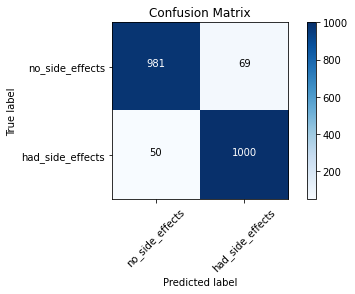

In [186]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save and Load a Model
# 1. model.save()

In [187]:
# Check first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This function saves:

- The achitecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration(loss, optimizer).
- The state of the optimizer, allowing to reume training exactly where you left off.

In [188]:
from tensorflow.keras.models import load_model
new_model =  load_model('models/medical_trial_model.h5')

In [189]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [190]:
new_model.get_weights()

[array([[ 0.3993929 , -0.36043322, -0.08837849, -0.01029366,  0.49016243,
          0.26285052, -0.13381603,  0.6255823 ,  0.08669328,  0.5549214 ,
          0.27446228, -0.2805984 , -0.34899592,  0.69642955, -0.50992274,
         -0.34197927]], dtype=float32),
 array([-0.16285609,  0.        ,  0.        ,  0.        ,  0.11819044,
        -0.11768404,  0.        , -0.16873372,  0.21463364, -0.187905  ,
        -0.1230671 ,  0.        ,  0.        , -0.16554344,  0.        ,
         0.        ], dtype=float32),
 array([[-2.63175964e-01, -6.59240186e-02, -5.44281900e-01,
          6.57995939e-01, -1.09258316e-01, -2.22116858e-01,
          4.15968388e-01,  1.19018316e-01, -3.73761535e-01,
         -7.74247646e-02,  5.41972697e-01, -1.16038196e-01,
         -9.52329040e-02, -6.29398227e-02, -1.74013168e-01,
          4.76710379e-01,  2.98349589e-01,  5.14727421e-02,
         -2.77383596e-01,  2.21228287e-01,  2.17432976e-01,
          3.85824621e-01, -5.04590213e-01, -6.09154046e-01,
 

In [191]:
new_model.optimizer

# 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the achitecture only.

In [192]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [193]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [194]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [195]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function to save the weights only.

In [203]:
# Check first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save('models/my_model_weights.h5')

In [204]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')    
])

In [205]:
model2.load_weights('models/my_model_weights.h5')

In [206]:
model2.get_weights()

[array([[ 0.3993929 , -0.36043322, -0.08837849, -0.01029366,  0.49016243,
          0.26285052, -0.13381603,  0.6255823 ,  0.08669328,  0.5549214 ,
          0.27446228, -0.2805984 , -0.34899592,  0.69642955, -0.50992274,
         -0.34197927]], dtype=float32),
 array([-0.16285609,  0.        ,  0.        ,  0.        ,  0.11819044,
        -0.11768404,  0.        , -0.16873372,  0.21463364, -0.187905  ,
        -0.1230671 ,  0.        ,  0.        , -0.16554344,  0.        ,
         0.        ], dtype=float32),
 array([[-2.63175964e-01, -6.59240186e-02, -5.44281900e-01,
          6.57995939e-01, -1.09258316e-01, -2.22116858e-01,
          4.15968388e-01,  1.19018316e-01, -3.73761535e-01,
         -7.74247646e-02,  5.41972697e-01, -1.16038196e-01,
         -9.52329040e-02, -6.29398227e-02, -1.74013168e-01,
          4.76710379e-01,  2.98349589e-01,  5.14727421e-02,
         -2.77383596e-01,  2.21228287e-01,  2.17432976e-01,
          3.85824621e-01, -5.04590213e-01, -6.09154046e-01,
 